# Redes Neurais Para Finanças


# Instalando os pacotes

In [1]:
!pip install pandas numpy scikit-learn keras matplotlib plotly yfinance

# Obtendo o dataset

In [2]:
# Importa as bibliotecas necessárias
import pandas as pd          # Biblioteca para manipulação de dados
import yfinance as yf        # Biblioteca para obter dados financeiros do Yahoo Finance
import os                    # Biblioteca para interagir com o sistema operacional

# Define o nome da pasta onde os dados serão armazenados
folder = 'datasets'

# Verifica se a pasta existe; se não existir, cria a pasta
if not os.path.exists(folder):
  os.makedirs(folder)

# Define o nome da ação (ticker) que será baixada
name = "NVDA"

# Cria o caminho completo do arquivo CSV onde os dados serão salvos
file = os.path.join(folder, f'{name}.csv')

# Baixa os dados históricos da ação a partir do Yahoo Finance
data = yf.download(name, start='2004-01-01', end='2024-06-19')

# Salva os dados baixados em um arquivo CSV
data.to_csv(file)

# Lê o arquivo CSV salvo para um DataFrame do pandas
df = pd.read_csv(file)

# Exibe o DataFrame
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,Price,Close,High,Low,Open,Volume
0,Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
1,Date,NaN,NaN,NaN,NaN,NaN
2,2004-01-02,0.17636950314044952,0.18255926049153778,0.17636950314044952,0.1801145396570777,436416000
3,2004-01-05,0.18210075795650482,0.18332403383275758,0.17743963455215106,0.1790443924599848,575292000
4,2004-01-06,0.18951387703418732,0.19203562499036053,0.18072532940473474,0.18156622178277493,1093344000
...,...,...,...,...,...,...
5147,2024-06-12,125.16915130615234,126.84873770805827,122.53980200765415,123.02967915018486,299595000
5148,2024-06-13,129.5780792236328,129.7680348697194,127.12868568021801,129.35813218658845,260704500
5149,2024-06-14,131.84750366210938,132.8072585317083,128.28838344854194,129.92797866788297,309320400
5150,2024-06-17,130.94773864746094,133.69706139159663,129.54808953427707,132.9572533982128,288504400


# Análise Exploratória

In [3]:
df.head(), df.tail() # Visualiza as primeiras e últimas linhas do DataFrame

(        Price                Close                 High                  Low  \
 0      Ticker                 NVDA                 NVDA                 NVDA   
 1        Date                  NaN                  NaN                  NaN   
 2  2004-01-02  0.17636950314044952  0.18255926049153778  0.17636950314044952   
 3  2004-01-05  0.18210077285766602  0.18332404883401848  0.17743964907189622   
 4  2004-01-06  0.18951381742954254  0.19203556459259236   0.1807252725642055   
 
                   Open      Volume  
 0                 NVDA        NVDA  
 1                  NaN         NaN  
 2   0.1801145396570777   436416000  
 3  0.17904440711104602   575292000  
 4  0.18156616467777387  1093344000  ,
            Price               Close                High                 Low  \
 5147  2024-06-12  125.16915130615234  126.84873770805827  122.53980200765415   
 5148  2024-06-13   129.5780792236328   129.7680348697194  127.12868568021801   
 5149  2024-06-14  131.84750366210938   

In [4]:
df.info() # Exibe um resumo das informações do DataFrame, incluindo o número de linhas e colunas, tipos de dados e uso de memória.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   5152 non-null   object
 1   Close   5151 non-null   object
 2   High    5151 non-null   object
 3   Low     5151 non-null   object
 4   Open    5151 non-null   object
 5   Volume  5151 non-null   object
dtypes: object(6)
memory usage: 241.6+ KB


In [5]:
df.describe()  # Exibe um resumo estatístico das colunas numéricas do DataFrame, incluindo a contagem, média, desvio padrão, valor mínimo, quartis e valor máximo.

,Price,Close,High,Low,Open,Volume
count,5152,5151,5151,5151,5151,5151
unique,5152,4428,5136,5135,5142,5103
top,2024-05-24,0.2980252802371979,0.33901974693997733,0.3209502708467699,0.5338647736586639,503448000
freq,1,6,2,2,2,3


In [7]:
# Converte a coluna 'Open' para tipo numérico (float), ignorando erros de conversão
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')

# Filtra o DataFrame para mostrar apenas as linhas onde a coluna 'Open' tem valor menor ou igual a 0.080583
df[df['Open'] <= 0.080583]

,Price,Close,High,Low,Open,Volume
151,2004-08-06,0.07206067442893982,0.0779450673548549,0.07106756121083276,0.077257,5088948000
152,2004-08-09,0.0752701684832573,0.07695194559260275,0.07267230434773128,0.073895,1579212000
153,2004-08-10,0.08123067766427994,0.08199545912619988,0.07817431202055784,0.079474,2051916000
154,2004-08-11,0.07886207103729248,0.0801614576069542,0.07832745913268616,0.080161,963816000
155,2004-08-12,0.0770280733704567,0.07932057339870828,0.076874936686048,0.079091,654384000
156,2004-08-13,0.08023758977651596,0.08077220182498396,0.07817433666763471,0.078862,815700000
157,2004-08-16,0.07947372645139694,0.08145994651696964,0.07886208832150937,0.079321,531732000


In [10]:
# Lista de colunas que você quer
cols = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

# Mantém apenas as colunas que existem no DataFrame
cols = [col for col in cols if col in df.columns]

# Seleciona as colunas disponíveis
df_corr = df[cols]

# Converte todas as colunas selecionadas para tipo numérico, forçando erros para NaN
df_corr = df_corr.apply(pd.to_numeric, errors='coerce')

# Calcula a matriz de correlação
df_corr.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999880,0.999827,0.999637,-0.104175
High,0.999880,1.000000,0.999834,0.999819,-0.102805
Low,0.999827,0.999834,1.000000,0.999873,-0.105922
Close,0.999637,0.999819,0.999873,1.000000,-0.104463
Volume,-0.104175,-0.102805,-0.105922,-0.104463,1.000000


In [11]:
# Importa a biblioteca de visualização Plotly Express
import plotly.express as px

# Cria um heatmap (mapa de calor) da matriz de correlação
fig = px.imshow(df_corr.corr())

# Exibe o gráfico interativo
fig.show()

In [13]:
# Calcula a matriz de correlação
corr_matrix = pd.DataFrame(df_corr.corr())

# Cria o heatmap com uma escala de cores personalizada (Red-Blue)
fig = px.imshow(
  corr_matrix,
  x=corr_matrix.columns,         # Rótulos do eixo x
  y=corr_matrix.columns,         # Rótulos do eixo y
  zmin=-1,                       # Correlação mínima (negativa)
  zmax=1,                        # Correlação máxima (positiva)
  text_auto=True,                # Mostra os valores nas células
  color_continuous_scale='RdBu'  # Define a escala de cores (vermelho para -1, azul para +1)
)

# Atualiza o layout do gráfico
fig.update_layout(
  title='Matriz de Correlação',  # Título do gráfico
  yaxis_title=" ",               # Sem título no eixo y
  xaxis_title=" ",               # Sem título no eixo x
  coloraxis_colorbar=dict(
    title="Correlação",           # Título da barra de cores
    ticks="outside"               # Posição dos ticks para fora
  )
)

# Exibe o gráfico interativo
fig.show()

In [27]:
# Resetando o índice sem adicionar novas colunas
df = df.reset_index(drop=True)

# Criando um gráfico de linha mais estilizado
fig = px.line(
  df,
  x='Date',
  y='Close',
  title=f'Fechamento do preço das ações de {name}'
)

# Melhorando o layout do gráfico
fig.update_layout(
  title_font_size=24,
  title_x=0.5,
  title_font_family="Arial",
  xaxis_title='Data',
  yaxis_title='Preço de Fechamento (USD)',
  plot_bgcolor='white',
  xaxis=dict(
    showgrid=False,
    showline=True,
    linewidth=2,
    linecolor='black',
    tickangle=45
  ),
  yaxis=dict(
    showgrid=True,
    gridcolor='LightGray',
    gridwidth=0.5,
    zeroline=True,
    zerolinecolor='LightGray'
  )
)

# Exibe o gráfico
fig.show()

# Preparando os Dados

In [29]:
import plotly.express as px

# Cria um box plot estilizado para visualizar a distribuição dos preços de fechamento ('Close')
fig = px.box(
  df,
  y='Close',
  points='outliers',      # Mostra apenas os outliers (pontos fora do padrão)
  color_discrete_sequence=['#636EFA']  # Define a cor do box plot
)

# Personaliza o layout do gráfico
fig.update_layout(
  title='Distribuição dos Preços de Fechamento',
  yaxis_title='Preço de Fechamento (Close)',
  xaxis_title='',         # Remove o título do eixo x
  plot_bgcolor='white',    # Define o fundo branco
  yaxis=dict(
    gridcolor='lightgrey'  # Cor da grade
  )
)

# Exibe o gráfico
fig.show()

In [31]:
# Remove linhas onde a coluna 'Close' não é numérica
df = df[pd.to_numeric(df['Close'], errors='coerce').notnull()]

# Converte a coluna 'Close' para número (float)
df['Close'] = df['Close'].astype(float)

# Calcula os outliers da coluna 'Close' usando o método do intervalo interquartil (IQR)
Q1 = df['Close'].quantile(0.25)  # Primeiro quartil (25%)
Q3 = df['Close'].quantile(0.75)  # Terceiro quartil (75%)
IQR = Q3 - Q1                    # Intervalo interquartil (IQR = Q3 - Q1)

# Filtra os dados que estão abaixo de (Q1 - 1.5 * IQR) ou acima de (Q3 + 1.5 * IQR), considerados outliers
outliers = df[(df['Close'] < (Q1 - 1.5 * IQR)) | (df['Close'] > (Q3 + 1.5 * IQR))]

# Exibe os outliers identificados
outliers

<ipython-input-31-ea1302865d9a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,level_0,index,Price,Close,High,Low,Open,Volume
4198,4198,4198,4198,2020-09-02,14.304640,14.683780290429024,13.859441849310095,14.660847,874012000
4222,4222,4222,4222,2020-10-07,13.923254,14.078051554795485,13.823047156809322,13.958900,418084000
4225,4225,4225,4225,2020-10-12,14.184490,14.305137430572008,13.871905504040015,13.948680,434744000
4226,4226,4226,4226,2020-10-13,14.206674,14.306631336116029,13.977843485573267,14.254783,344604000
4227,4227,4227,4227,2020-10-14,14.054122,14.300899264909264,13.919266522252348,14.248802,276100000
...,...,...,...,...,...,...,...,...,...
5147,5147,5147,5147,2024-06-12,125.169151,126.84873770805827,122.53980200765415,123.029679,299595000
5148,5148,5148,5148,2024-06-13,129.578079,129.7680348697194,127.12868568021801,129.358132,260704500
5149,5149,5149,5149,2024-06-14,131.847504,132.8072585317083,128.28838344854194,129.927979,309320400
5150,5150,5150,5150,2024-06-17,130.947739,133.69706139159663,129.54808953427707,132.957253,288504400


In [32]:
# Calcula a mediana da coluna 'Close'
media_close = df['Close'].median()

# Substitui apenas os valores de 'Close' que são outliers
for outlier in outliers['Close']:
  df['Close'].replace(outlier, media_close, inplace=True)

df

<ipython-input-32-99779cf09f4f>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Date,level_0,index,Price,Close,High,Low,Open,Volume
2,2,2,2,2004-01-02,0.176370,0.18255926049153778,0.17636950314044952,0.180115,436416000
3,3,3,3,2004-01-05,0.182101,0.18332404883401848,0.17743964907189622,0.179044,575292000
4,4,4,4,2004-01-06,0.189514,0.19203556459259236,0.1807252725642055,0.181566,1093344000
5,5,5,5,2004-01-07,0.191195,0.192111701032993,0.18607507895347275,0.187374,673032000
6,6,6,6,2004-01-08,0.191882,0.19448030440314124,0.19004844084146685,0.193563,433752000
...,...,...,...,...,...,...,...,...,...
5147,5147,5147,5147,2024-06-12,0.520551,126.84873770805827,122.53980200765415,123.029679,299595000
5148,5148,5148,5148,2024-06-13,0.520551,129.7680348697194,127.12868568021801,129.358132,260704500
5149,5149,5149,5149,2024-06-14,0.520551,132.8072585317083,128.28838344854194,129.927979,309320400
5150,5150,5150,5150,2024-06-17,0.520551,133.69706139159663,129.54808953427707,132.957253,288504400


In [35]:
# Filtra os dados para criar um novo DataFrame contendo apenas os valores de 'Close' que eram considerados outliers
new_data = df[df['Close'].isin(outliers['Close'])]

# Plota um boxplot dos valores de 'Close' depois da substituição dos outliers
px.box(df, y='Close')

# Preparando os Dados

In [36]:
df['Date'].unique().max()

np.int64(5151)

In [37]:
# Converte a coluna 'Date' para o formato de data e hora (datetime)
df['Date'] = pd.to_datetime(df['Date'])

# Exibe a data mais recente presente na coluna 'Date'
df['Date'].unique().max()

Timestamp('1970-01-01 00:00:00.000005151')

In [38]:
# Define o número total de linhas do DataFrame
total_rows = len(df)

# Define o número de linhas que serão usadas para teste
legs = 21

# Separa os dados em treino (do início até a parte final menos 'legs')
df_train = df.iloc[:total_rows - legs]

# Separa os dados em teste (as últimas 'legs' linhas)
df_test = df.iloc[total_rows - legs:]

# Imprime o número de linhas do DataFrame completo
print(len(df))

# Imprime o número de linhas do conjunto de treino
print(len(df_train))

# Imprime o número de linhas do conjunto de teste
print(len(df_test))

# Verifica se a soma das linhas de treino e teste corresponde ao total de linhas
print(len(df_train) + len(df_test))

5150
5129
21
5150


In [39]:
# Seleciona apenas a coluna 'Close' do conjunto de treino e converte para um array NumPy
training_set = df_train['Close'].values

# Exibe o array com os valores de fechamento usados para treinamento
training_set

array([0.1763695 , 0.18210077, 0.18951382, ..., 0.52055061, 0.52055061,
       0.52055061])

In [40]:
# Importa o MinMaxScaler para normalizar os dados na faixa de 0 a 1
from sklearn.preprocessing import MinMaxScaler

# Cria uma instância do MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))

# Ajusta o scaler aos dados de treino e transforma (normaliza) os valores de 'Close'
training_set_scaled = sc.fit_transform(training_set.reshape(-1, 1))

# Exibe o conjunto de treino já normalizado
training_set_scaled

array([[0.0075811 ],
       [0.00799765],
       [0.00853642],
       ...,
       [0.03259597],
       [0.03259597],
       [0.03259597]])

In [41]:
intervalo_entre_os_dias = 60

In [42]:
# Inicializa listas vazias para armazenar as sequências de entrada (X_train) e os valores de saída (y_train)
X_train = []
y_train = []

# Cria as sequências: para cada ponto, usa os 'intervalo_entre_os_dias' anteriores como entrada
for i in range(intervalo_entre_os_dias, len(training_set)):
  X_train.append(training_set_scaled[i-intervalo_entre_os_dias:i, 0])  # Pega os 'intervalo_entre_os_dias' valores anteriores
  y_train.append(training_set_scaled[i, 0])  # Valor alvo (previsão) correspondente

# Converte as listas em arrays NumPy, prontos para treinar o modelo
import numpy as np
X_train, y_train = np.array(X_train), np.array(y_train)

In [43]:
X_train.shape

(5069, 60)

#  Treino


In [44]:
# Define as dimensões necessárias para o modelo sequencial (ex: LSTM)
batch_size = len(X_train)         # Número de amostras (linhas)
time_steps = intervalo_entre_os_dias  # Quantidade de passos de tempo (colunas)
features = 1                      # Apenas uma característica ('Close')

# Reorganiza (reshape) X_train no formato [amostras, passos de tempo, características]
X_train = np.reshape(X_train, (batch_size, time_steps, features))

In [45]:
X_train.shape

(5069, 60, 1)

In [46]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [47]:
# Importa as classes necessárias para construir a rede neural
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Inicializa o modelo sequencial (modelo empilhado camada a camada)
rnn = Sequential()

In [48]:
# Adiciona a primeira camada LSTM com 50 unidades
# 'return_sequences=True' indica que a saída será usada em outra camada LSTM
# 'input_shape' define o formato da entrada (intervalo de dias, 1 feature por dia)
rnn.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, features)))
# Adiciona uma camada Dropout para evitar overfitting (desativa 50% dos neurônios aleatoriamente)
rnn.add(Dropout(0.5))

# Adiciona a segunda camada LSTM com 50 unidades
rnn.add(LSTM(units=50, return_sequences=True))
rnn.add(Dropout(0.5))

# Adiciona a terceira camada LSTM com 50 unidades
rnn.add(LSTM(units=50, return_sequences=True))
rnn.add(Dropout(0.5))

# Adiciona a quarta camada LSTM com 50 unidades
# Como é a última camada LSTM, 'return_sequences' é False por padrão (não precisa especificar)
rnn.add(LSTM(units=50))
rnn.add(Dropout(0.5))

# Adiciona a camada densa final para gerar a previsão (uma saída)
rnn.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [50]:
from tensorflow.keras.utils import plot_model

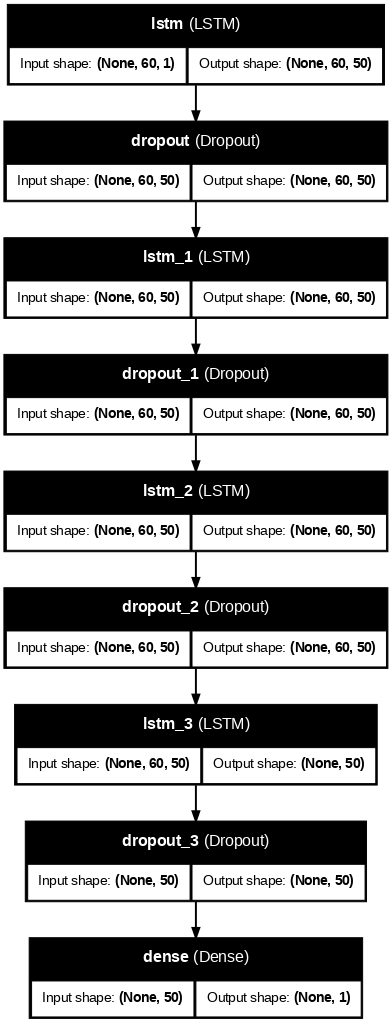

In [57]:
# Gera e salva um diagrama visual da arquitetura da RNN criada
# 'to_file' define o nome do arquivo de imagem que será gerado
# 'show_shapes=True' mostra as dimensões de entrada e saída de cada camada
# 'show_layer_names=True' mostra o nome das camadas no gráfico
# 'expand_nested=True' permite expandir camadas aninhadas, se houver
plot_model(
  rnn,
  to_file='redes_graficas.png',
  show_shapes=True,
  show_layer_names=True,
  expand_nested=True,
  dpi=70
)

In [59]:
# Compila o modelo RNN
# 'adam' é o otimizador (ajusta os pesos da rede para minimizar o erro)
# 'mean_squared_error' é a função de perda (mede o erro da previsão)
# 'accuracy' será usada como métrica de avaliação (não é ideal para regressão, mas será exibida)
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Treina o modelo com os dados de treino
# epochs = 30 -> número de vezes que o modelo verá todos os dados
# batch_size = 32 -> número de amostras passadas por vez antes de atualizar os pesos
rnn.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 6.3141e-04 - loss: 0.0117
Epoch 2/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 22s 118ms/step - accuracy: 1.2361e-04 - loss: 0.0083
Epoch 3/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 19s 111ms/step - accuracy: 8.8904e-05 - loss: 0.0114
Epoch 4/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 22s 118ms/step - accuracy: 4.1001e-04 - loss: 0.0086
Epoch 5/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 4.8982e-04 - loss: 0.0061
Epoch 6/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 19s 120ms/step - accuracy: 3.0072e-04 - loss: 0.0094
Epoch 7/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 1.6955e-04 - loss: 0.0061
Epoch 8/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 22s 119ms/step - accuracy: 2.4317e-04 - loss: 0.0069
Epoch 9/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - accuracy: 4.9353e-04 - loss: 0.0073
Epoch 10/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 21s 120ms/step - accuracy: 1.3156e-04 - loss: 0.0055
Epoch 11/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 19s 112ms/step - accuracy: 4

# Teste

In [60]:
# Testando

# Pega os valores reais de fechamento do conjunto de teste
fechamento_real = df_test['Close'].values

# Concatena todo o conjunto (train + test)
dataset_total = pd.concat((df['Close'], df_test['Close']), axis=0)

# Prepara as entradas para fazer as previsões
inputs = dataset_total[len(dataset_total) - len(df_test) - intervalo_entre_os_dias:].values
inputs = inputs.reshape(-1, 1)

# Normaliza os dados (importante: só 1 vez)
inputs = sc.transform(inputs)

In [61]:
# Prepara o conjunto de teste (X_test) para fazer previsões

X_test = []
for i in range(intervalo_entre_os_dias, len(inputs)):
  # Cria as sequências de entrada usando a mesma lógica de 60 dias
  X_test.append(inputs[i-intervalo_entre_os_dias:i, 0])

# Converte para array numpy
X_test = np.array(X_test)

# Ajusta a forma do array para ser compatível com a entrada da RNN (batch_size, time_steps, features)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [62]:
# Faz a previsão uma única vez
previsao = rnn.predict(X_test)

# Mostra a previsão normalizada
print(f'Previsão normalizada: {previsao}')

# Faz o inverso da normalização para trazer para os valores reais
previsao_real = sc.inverse_transform(previsao)

# Mostra os valores reais
print(f'Previsão real: {previsao_real}')

# Se quiser, pode salvar também a previsão final em uma variável
variacao_final = previsao_real
print(variacao_final)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
Previsão normalizada: [[0.02952492]
 [0.02952492]
 [0.02952492]
 [0.02952492]
 [0.02952492]
 [0.02952492]
 [0.02952492]
 [0.02952492]
 [0.02952492]
 [0.02952492]
 [0.02952492]
 [0.02952492]
 [0.02952492]
 [0.02952492]
 [0.02952492]
 [0.02952492]
 [0.02952492]
 [0.02952492]
 [0.02952492]
 [0.02952492]
 [0.02952493]]
Previsão real: [[0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.478296  ]]
[[0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.47829592]
 [0.478296  ]]


# Avaliação de Resultados

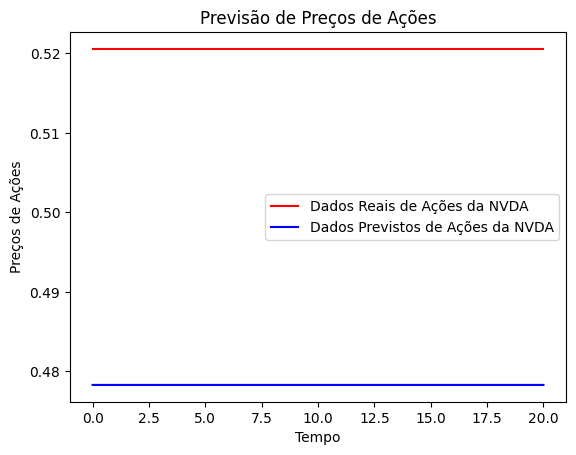

In [63]:
import matplotlib.pyplot as plt

plt.plot(fechamento_real, color='red', label=f'Dados Reais de Ações da {name}')
plt.plot(variacao_final, color='blue', label=f'Dados Previstos de Ações da {name}')
plt.title('Previsão de Preços de Ações')
plt.xlabel('Tempo')
plt.ylabel('Preços de Ações')
plt.legend()
plt.show()
